##***LAB 10 : Naive Bayes Classifier***##

  1. Binary Classification using Naive Bayes Classifier
  
  2. Sentiment Analysis using Naive Bayes

  


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

##Binary Classification using Naive Bayes Classifier##

Useful References : 
1. https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/

2. https://www.analyticsvidhya.com/blog/2021/01/a-guide-to-the-naive-bayes-algorithm/

3. https://towardsdatascience.com/implementing-naive-bayes-algorithm-from-scratch-python-c6880cfc9c41

**Note : The goal of this experiment is to perform and understand Naive Bayes classification by applying it on the below dataset, you can either fill in the below functions to get the result or you can create a class of your own using the above references to perform classification**

1. Generation of 2D training data

Text(0.5, 1.0, 'Data visualization')

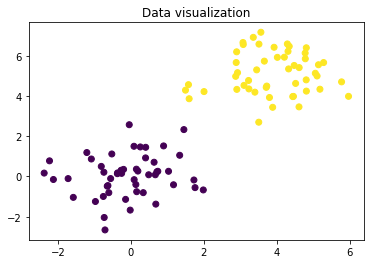

In [28]:
mean1=np.array([0,0])
mean2=np.array([4,5])
var=np.array([[1,0.1],[0.1,1]])
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,50)
data2=np.random.multivariate_normal(mean2,var,50)
data=np.concatenate((data1,data2))
label=np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0])))

plt.figure()
plt.scatter(data[:,0],data[:,1],c=label)
plt.title('Data visualization')


In [29]:
from collections import Counter
unique_labels=np.unique(label).astype(int)
print(unique_labels)

[0 1]


2. Split the Dataset by Class Values (Create a Dictionary)

In [30]:
def class_dictionary(data,label):
  class_dict = {}
  for i in unique_labels:
    class_dict[i] = list(data[label==i])
  return class_dict
# print(data)
class_dictionary(data,label)

{0: [array([-1.57668985, -1.03982262]),
  array([-2.22908837,  0.77738534]),
  array([-0.72944014, -2.04059601]),
  array([-0.60307093, -0.80613793]),
  array([-0.1988887,  0.351987 ]),
  array([-1.0823819 ,  0.86873075]),
  array([-0.64602276, -0.4827786 ]),
  array([-0.55301333, -0.10534224]),
  array([-0.97041435, -1.24566304]),
  array([ 0.34076762, -0.80512206]),
  array([1.45488724, 2.3318086 ]),
  array([-0.14322361, -1.13894247]),
  array([-0.70767693, -2.65891323]),
  array([ 0.09163132, -0.15950217]),
  array([-2.12241532, -0.15106366]),
  array([-0.36859122,  0.13876704]),
  array([ 1.9871582 , -0.67035913]),
  array([0.15313648, 0.36290063]),
  array([-1.71898891, -0.10582707]),
  array([0.49004011, 0.08445841]),
  array([ 1.73020468, -0.1749493 ]),
  array([-0.04321608,  2.57402376]),
  array([0.67183735, 0.084099  ]),
  array([0.40754152, 1.45065429]),
  array([1.3396092 , 1.05418816]),
  array([0.40455369, 0.92363786]),
  array([ 1.17081537, -0.41316892]),
  array([-0.26

3. Calculate Mean, Std deviation and count for each column in a dataset

In [31]:
def get_variables(class_dict):
  var_dict = {}
  for i in unique_labels:
    var_dict[i] = [(np.mean(class_dict[i],axis=0)[0],np.std(class_dict[i],axis=0)[0],50),(np.mean(class_dict[i],axis=0)[1],np.std(class_dict[i],axis=0)[1],50)]
  ## Write your code here

  return var_dict
var_dict=get_variables(class_dictionary(data,label))
print(var_dict)

{0: [(-0.08143074021616499, 0.9927104621843587, 50), (0.05650317153356918, 1.0255393627439437, 50)], 1: [(3.8912935273386946, 1.0208299436699904, 50), (5.136474984683965, 1.035467336214579, 50)]}


In [32]:
mean_for_class0=[var_dict[0][0][0],var_dict[0][1][0]]
std_for_class0=[var_dict[0][0][1],var_dict[0][1][1]]
print("mean_for_class0",mean_for_class0)
print("std_for_class0",std_for_class0)


mean_for_class1=[var_dict[1][0][0],var_dict[1][1][0]]
std_for_class1=[var_dict[1][0][1],var_dict[1][1][1]]
print("mean_for_class1",mean_for_class1)
print("std_for_class1",std_for_class1)


mean_for_class0 [-0.08143074021616499, 0.05650317153356918]
std_for_class0 [0.9927104621843587, 1.0255393627439437]
mean_for_class1 [3.8912935273386946, 5.136474984683965]
std_for_class1 [1.0208299436699904, 1.035467336214579]


3. Calculate Class Probabilities

In [33]:
from math import exp,sqrt,pi
def calculate_probability(x,mean,stdev):
  exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
  return (1 / (sqrt(2 * pi) * stdev)) * exponent

def calculate_class_probabilities(variables,point):
  probabilities=dict()
  total_rec = float(np.sum([variables[i][0][2] for i in variables]))
  for key, class_arr in variables.items():
    # firstly, set P(k) to be fraction of records that are contained in 'k' class.     
    probabilities[key] = variables[key][0][2]/total_rec
    for i in range(len(class_arr)): 
      mean, sig, count = class_arr[i]
      probabilities[key] *= calculate_probability(point[i], mean, sig) # for kth class, get probability of FV being from that class
      # in naive bayes, we assume independence of dimensions, so we simply multiply the abovementioned probabilities



  ## Write your code here to calculate the class probabilities
  '''
  You can use the above function (calculate_probability) to calculate probability of an individual data point belonging to a particular class 
  based on mean and std deviation of that class
  
  '''
  return probabilities

4. Test the model using some samples

Test Data Size :  20


Text(0.5, 1.0, 'Data visualization')

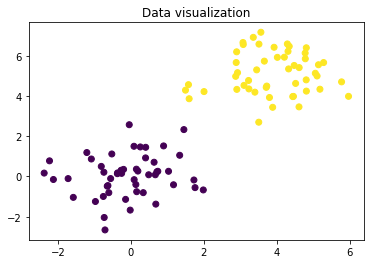

In [34]:
## Test Data Generation

mean1=np.array([0,0])
mean2=np.array([4,5])
var=np.array([[1,0.1],[0.1,1]])
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,10)
data2=np.random.multivariate_normal(mean2,var,10)
test_data=np.concatenate((data1,data2))
y_test=np.concatenate((np.zeros(data1.shape[0]),np.ones(data2.shape[0])))
print('Test Data Size : ',test_data.shape[0])
plt.figure()
plt.scatter(data[:,0],data[:,1],c=label)
plt.title('Data visualization')

Testing for a sample point

In [35]:
class_dict = class_dictionary(data,label)
var_dict = get_variables(class_dict)
# print(class_dict)
# print(var_dict)
print("test data[0] is ",test_data[0])
out = calculate_class_probabilities(var_dict,test_data[0])
print('Class Probabilites for the first sample of test dataset : ')
print(out)

test data[0] is  [-1.57668985 -1.03982262]
Class Probabilites for the first sample of test dataset : 
{0: 0.014197204018409897, 1: 8.332975086162373e-16}


**As seen above the class probability for the 1st sample is given, we can observe that probability is higher for class 0 than 1 and hence imply that this datapoint belongs to class 0**


Now Calculate the class probabilities for all the data points in the test dataset and calculate the accuracy by comparing the predicted labels with the true test labels


In [36]:
## Write your code here
pred_labels=[]
for point in test_data:
    prob = calculate_class_probabilities(var_dict,point)
    if(prob[0] > prob[1]):
        pred_labels.append(0)
    else:
        pred_labels.append(1)
pred_labels = np.array(pred_labels)

print(accuracy_score(y_true=y_test,y_pred=pred_labels)*100)

100.0


5. Use the Sci-kit Learn library to perform Gaussian Naive Bayes classifier on the above dataset, also report the accuracy and confusion matrix for the same

In [37]:
## Write your code here
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

model = GaussianNB()
model.fit(data,label)
y_pred = model.predict(test_data)
test_acc = model.score(test_data, y_test)
print("Testing accuracy = ", test_acc*100)
print(confusion_matrix(y_test, y_pred))

Testing accuracy =  100.0
[[10  0]
 [ 0 10]]


##Sentiment Analysis using Naive Bayes Classifier##

Go through the following [article](https://www.analyticsvidhya.com/blog/2021/07/performing-sentiment-analysis-with-naive-bayes-classifier/) and implement the same 

**Keypoints** : 
  
  1. The link to the dataset is given in the above article, download the same to perform sentiment analysis

  2. Understanding how to deal with text data is very important since it requires a lot of preprocessing, you can go through this [article](https://www.analyticsvidhya.com/blog/2021/06/text-preprocessing-in-nlp-with-python-codes/) if you are interested in learning more about it
  
  3. Split the dataset into train-test and train the model
  
  4. Report the accuracy metrics and try some sample prediction outside of those present in the dataset


**Note : The goal of this experiment is to explore a practical use case of Naive bayes classifier as well as to understand how to deal with textual data, you can follow any other open source implemetations of sentiment analysis using naive bayes also**

Other References : 

1. https://towardsdatascience.com/sentiment-analysis-introduction-to-naive-bayes-algorithm-96831d77ac91

2. https://gist.github.com/CateGitau/6608912ca92733036c090676c61c13cd

In [38]:
## Write your code here
## Write your code here
import pandas as pd
from sklearn.model_selection import train_test_split
import joblib
from sklearn.feature_extraction.text import CountVectorizer
pd.set_option('display.max_columns',None)
data = pd.read_csv('google_play_store_apps_reviews_training.csv')

print(data.head())

FileNotFoundError: [Errno 2] No such file or directory: 'google_play_store_apps_reviews_training.csv'

In [ ]:
def preprocess_data(data):
    # Remove package name as it's not relevant
    data = data.drop('package_name', axis=1)
    
    # Convert text to lowercase
    data['review'] = data['review'].str.strip().str.lower()
    return data

data = preprocess_data(data)
# Split into training and testing data
x = data['review']
y = data['polarity']
x, x_test, y, y_test = train_test_split(x,y, stratify=y, test_size=0.25, random_state=42)

print("training set x = \n", x.head())
print("___________________________________")
print("testing set x = \n", x_test.head())
print("___________________________________")
print("training set y = \n", y.head())
print("___________________________________")
print("testing set y = \n", y_test.head())

In [ ]:
vec = CountVectorizer(stop_words='english')
x = vec.fit_transform(x).toarray()
x_test = vec.transform(x_test).toarray()

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x, y)

In [ ]:
model.score(x_test, y_test)

In [ ]:
model.predict(vec.transform(['I love this book! Though I hate the beginning. It would be great for you.']))